In [332]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,final test
0,female,group B,bachelor's degree,standard,72,72,74,0
1,female,group C,some college,standard,69,90,88,1
2,female,group B,master's degree,standard,90,95,93,0
3,male,group A,associate's degree,free/reduced,47,57,44,0
4,male,group C,some college,standard,76,78,75,0


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   math score                   1000 non-null   int64 
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
 7   final test                   1000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


In [334]:
df.describe()

,math score,reading score,writing score,final test
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,0.358000
std,15.16308,14.600192,15.195657,0.479652
min,0.00000,17.000000,10.000000,0.000000
25%,57.00000,59.000000,57.750000,0.000000
50%,66.00000,70.000000,69.000000,0.000000
75%,77.00000,79.000000,79.000000,1.000000
max,100.00000,100.000000,100.000000,1.000000


In [335]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'math score', 'reading score', 'writing score', 'final test'],
      dtype='object')

In [336]:
# codificar numericamente las columnas Object
encoder = OrdinalEncoder()

columns_to_encode = ['gender', 'race/ethnicity', 'parental level of education', 'lunch']

encoder.fit(df[columns_to_encode])

df[columns_to_encode] = encoder.transform(df[columns_to_encode])

df.head()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,final test
0,0.0,1.0,1.0,1.0,72,72,74,0
1,0.0,2.0,4.0,1.0,69,90,88,1
2,0.0,1.0,3.0,1.0,90,95,93,0
3,1.0,0.0,0.0,0.0,47,57,44,0
4,1.0,2.0,4.0,1.0,76,78,75,0


<Axes: >

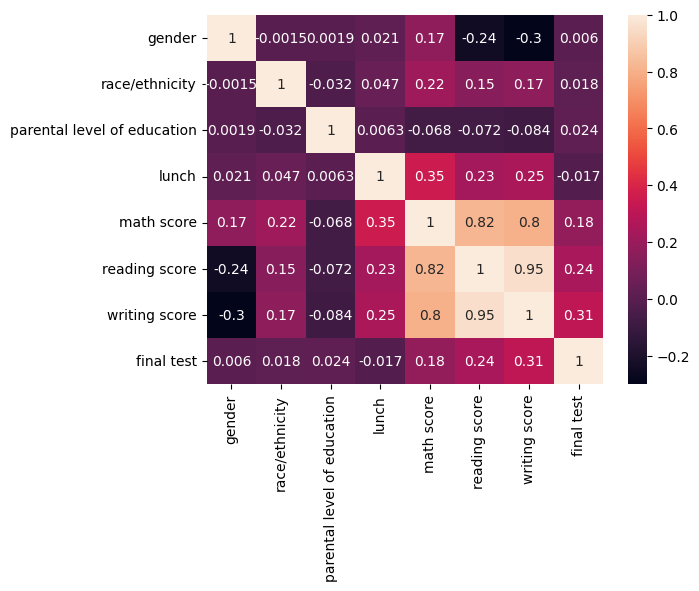

In [337]:
sns.heatmap(df.corr(), annot=True)

In [338]:
from sklearn.model_selection import train_test_split

X = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'math score', 'reading score', 'writing score']]

y = df[['final test']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [339]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

c:\Users\HP 11na\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP 11na\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Predictions

In [340]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report, confusion_matrix

pred = lr.predict(X_test)
log_reg_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()
# report = pd.concat([log_reg_report], axis=1, keys=["Logistic Regression"])

log_reg_report

,precision,recall,f1-score,support
0,0.741784,0.831579,0.784119,190.00
1,0.632184,0.500000,0.558376,110.00
accuracy,0.710000,0.710000,0.710000,0.71
macro avg,0.686984,0.665789,0.671247,300.00
weighted avg,0.701597,0.710000,0.701347,300.00
